Starting analysis of trending searches...

Data loaded successfully.

--- Analysis 1: Top 10 Most Popular Categories by Total Search Volume ---
categories
Sports                          130307900
Entertainment                    25484500
Other                             6070400
Law and Government                5693700
Technology                        5296900
Climate                           3725400
Politics                          2477300
Business and Finance              2389700
Politics, Law and Government      2070700
Games                             1230300
Name: search_volume, dtype: int64




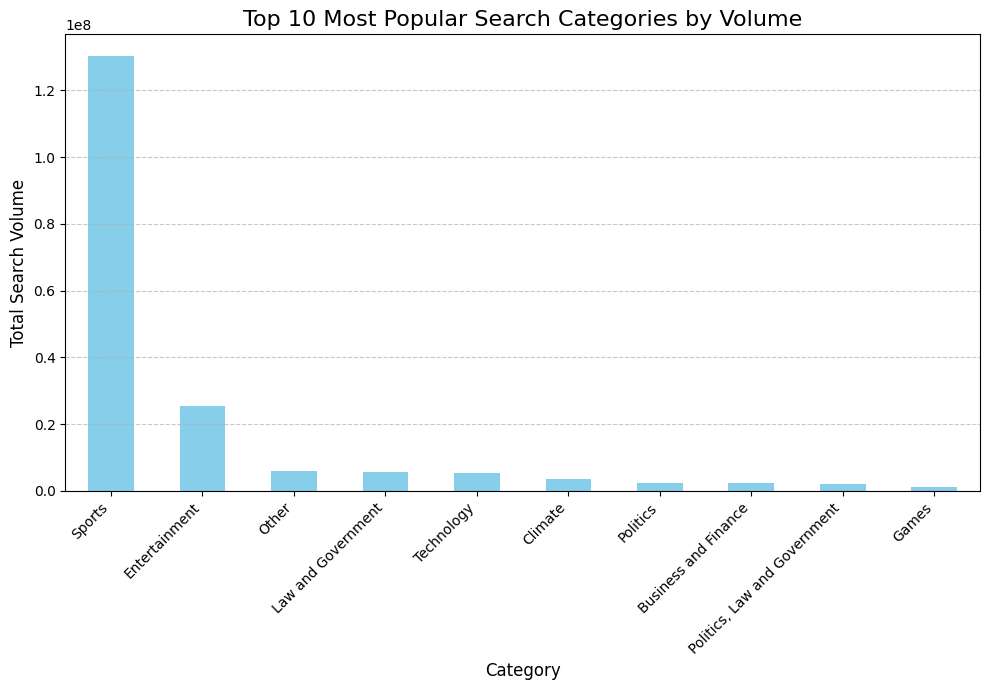

Plot 1 generated.

--- Analysis 2: Top 10 Absolute Trending Queries by Search Volume ---
                      query  search_volume     categories
4929           diane keaton        5000000  Entertainment
694              aws outage        5000000     Technology
7605             drake maye        2000000         Sports
3372               d'angelo        2000000  Entertainment
11062        dallas cowboys        2000000         Sports
5119      oklahoma vs texas        1000000         Sports
15015    bengals vs vikings        1000000         Sports
15030  charlie kirk funeral        1000000          Other
10643    tyreek hill injury        1000000         Sports
16555        bills dolphins        1000000         Sports




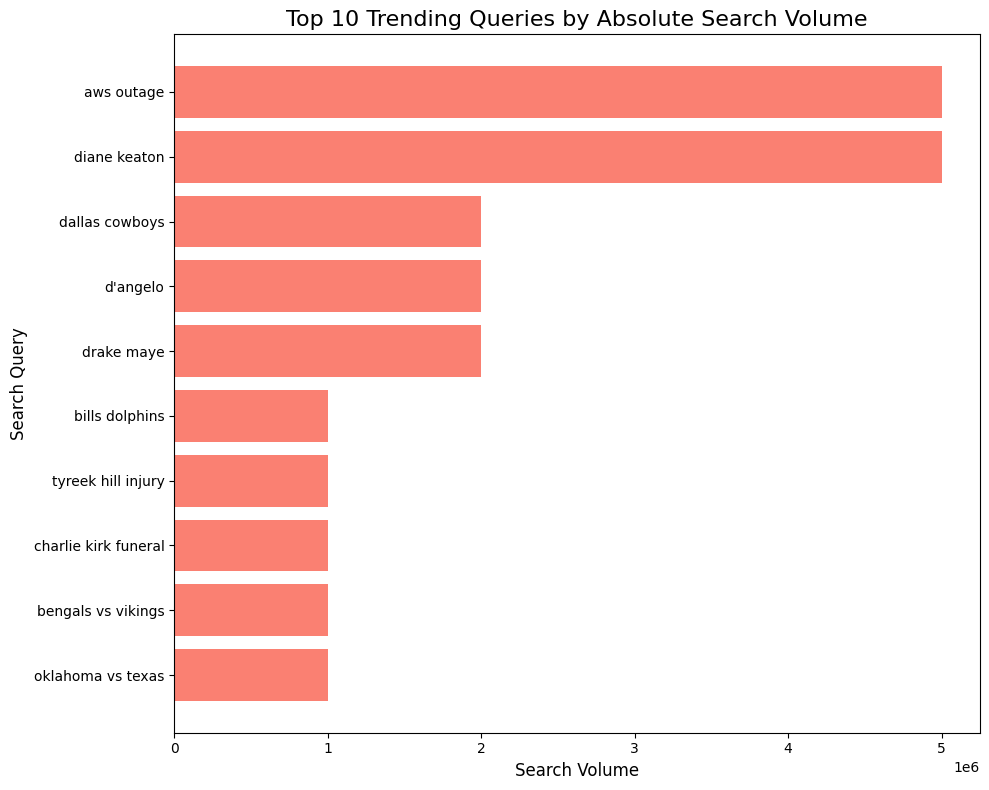

Plot 2 generated.

--- Analysis 3: Top 10 'Breakout' Queries by Percentage Increase ---
Showing trends with at least 1000 search volume:
                              query  increase_percentage  search_volume  \
16555                bills dolphins                 1000        1000000   
4723                  brewers score                 1000          50000   
14342           jimmy kimmel return                 1000         100000   
1552             penn state vs iowa                 1000          50000   
4815          south carolina vs lsu                 1000          20000   
4816                 james franklin                 1000          10000   
4827            rangers vs penguins                 1000           2000   
4829           kansas vs texas tech                 1000           5000   
4831   atlanta united - inter miami                 1000          10000   
1537      atlético madrid - osasuna                 1000          50000   

          categories  
16555         

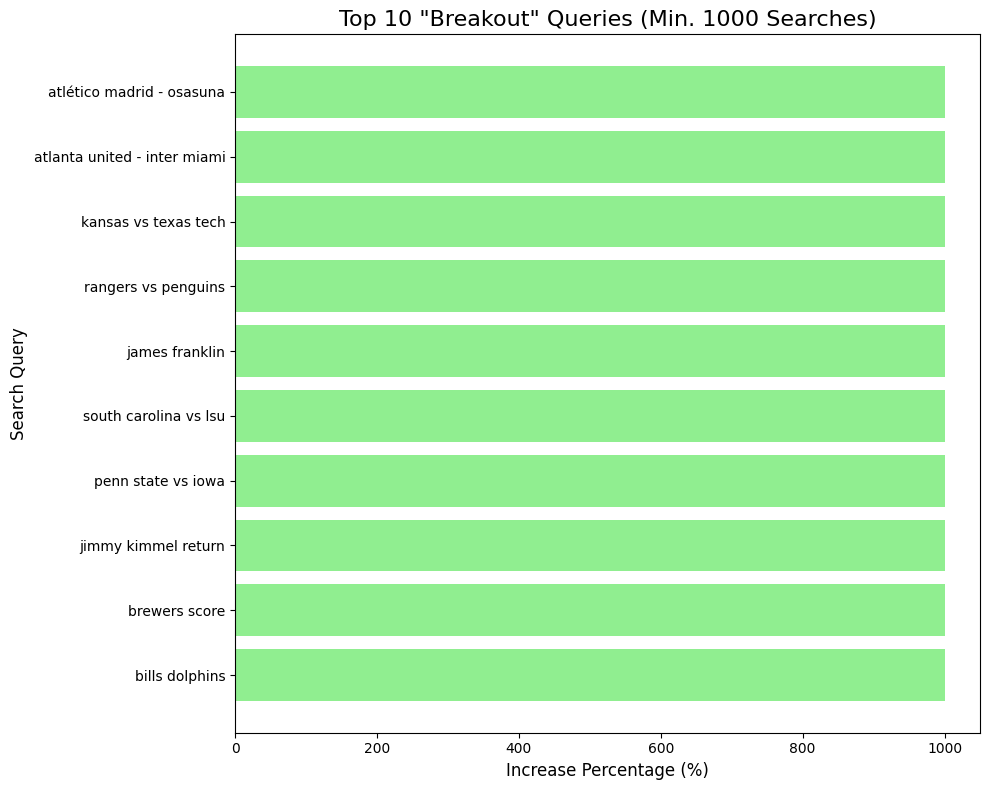

Plot 3 generated.

--- Analysis Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Starting analysis of trending searches...\n")


try:
    df = pd.read_csv('/Users/saivinay/Downloads/trending_searches_in_us.csv')
    
    df['start_date'] = pd.to_datetime(df['start_date'])
    print("Data loaded successfully.\n")
except Exception as e:
    print(f"Error loading file: {e}")
    
    raise


print("--- Analysis 1: Top 10 Most Popular Categories by Total Search Volume ---")
category_volume = df.groupby('categories')['search_volume'].sum().sort_values(ascending=False)
print(category_volume.head(10))
print("\n")


plt.figure(figsize=(10, 7))
category_volume.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Search Categories by Volume', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Search Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()  
print("Plot 1 generated.\n")



print("--- Analysis 2: Top 10 Absolute Trending Queries by Search Volume ---")
top_trends_volume = df.sort_values(by='search_volume', ascending=False)
print(top_trends_volume[['query', 'search_volume', 'categories']].head(10))
print("\n")


top_10_volume_plot = top_trends_volume.head(10).sort_values(by='search_volume', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_10_volume_plot['query'], top_10_volume_plot['search_volume'], color='salmon')
plt.title('Top 10 Trending Queries by Absolute Search Volume', fontsize=16)
plt.xlabel('Search Volume', fontsize=12)
plt.ylabel('Search Query', fontsize=12)
plt.tight_layout()

plt.show()  
print("Plot 2 generated.\n")



print("--- Analysis 3: Top 10 'Breakout' Queries by Percentage Increase ---")
min_volume_threshold = 1000
significant_trends = df[df['search_volume'] >= min_volume_threshold].copy()
breakout_trends = significant_trends.sort_values(by='increase_percentage', ascending=False)
print(f"Showing trends with at least {min_volume_threshold} search volume:")
print(breakout_trends[['query', 'increase_percentage', 'search_volume', 'categories']].head(10))
print("\n")


top_10_breakout_plot = breakout_trends.head(10).sort_values(by='increase_percentage', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_10_breakout_plot['query'], top_10_breakout_plot['increase_percentage'], color='lightgreen')
plt.title(f'Top 10 "Breakout" Queries (Min. {min_volume_threshold} Searches)', fontsize=16)
plt.xlabel('Increase Percentage (%)', fontsize=12)
plt.ylabel('Search Query', fontsize=12)
plt.tight_layout()

plt.show() 
print("Plot 3 generated.\n")

print("--- Analysis Complete ---")